In [466]:
# simple MLP to learn to compute two number addition (numbers between 1 to 10)

In [1002]:
import torch
import numpy as np
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import matplotlib.pyplot as plt


In [937]:
(x - np.mean(x)) / np.std(x)

array([[-0.85833768, -0.25046095],
       [-0.5806784 , -0.68648629],
       [-0.06339535, -0.4396012 ],
       ...,
       [-0.94478204, -0.12044863],
       [-0.80785417,  0.94350854],
       [-0.82963815,  0.87089528]])

In [ ]:
x = std*z + m

In [1153]:
x = []
y = np.zeros(10000)

for d in range(len(y)):
    # trained on ranges between 0 to 100. Can change to 1k or 10k
    x.append([np.random.randint(0,1001), np.random.randint(0,1001)])
    y[d] = x[d][0] + x[d][1] 

x = np.array(x)

In [1136]:
class SumDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        # normalise dataset
        self.x = (x - np.mean(x)) / np.std(x) 
        #self.x = x / np.max(x)
        self.y = (y - np.mean(y)) / np.std(y) 
        #self.y = y / np.max(y)
        
        self.x = self.x.astype('float32')
        self.y = self.y.reshape(len(y), 1)
        self.y = self.y.astype('float32')
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return [self.x[idx], self.y[idx]]
    
    def get_splits(self, n_test = 0.33):
        test_size = round(n_test * len(self.x))
        train_size = len(self.x) - test_size
        
        return torch.utils.data.random_split(self, [train_size, test_size]) # need random split here
    
    def prepare_dataset(self):
        train, test = self.get_splits()
        train_dl = torch.utils.data.DataLoader(train, batch_size=1, shuffle=True) # batching this dataset does not work
        test_dl = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)
        
        return train_dl, test_dl
        

In [1147]:
# Do not use, small model produces poor results 

class MLP(torch.nn.Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        print("small model")
        # first hidden layer input
        self.hidden1 = torch.nn.Linear(n_inputs, 10)
        torch.nn.init.xavier_uniform_(self.hidden1.weight)
        self.act1 = torch.nn.Sigmoid()
        # second hiddn layer
        self.hidden2 = torch.nn.Linear(10, 8)
        torch.nn.init.xavier_uniform_(self.hidden2.weight)
        self.act2 = torch.nn.Sigmoid()
        
        # third hidden layer, output
        self.hidden3 = torch.nn.Linear(8, 1)
        torch.nn.init.xavier_uniform_(self.hidden3.weight)

        
    def forward(self, d):
        d = self.hidden1(d)
        d = self.act1(d)
        d = self.hidden2(d)
        d = self.act2(d)        
        d = self.hidden3(d)

        return d

In [1138]:
class MLP(torch.nn.Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # first hidden layer input
        self.hidden1 = torch.nn.Linear(n_inputs, 200)
        torch.nn.init.xavier_uniform_(self.hidden1.weight)
        self.act1 = torch.nn.Sigmoid()
        # second hiddn layer
        self.hidden2 = torch.nn.Linear(200, 100)
        torch.nn.init.xavier_uniform_(self.hidden2.weight)
        self.act2 = torch.nn.Sigmoid()
        
        self.hidden3 = torch.nn.Linear(100, 20)
        torch.nn.init.xavier_uniform_(self.hidden3.weight)
        self.act3 = torch.nn.Sigmoid()
        
        # third hidden layer, output
        self.hidden4 = torch.nn.Linear(20, 1)
        torch.nn.init.xavier_uniform_(self.hidden3.weight)
        
    def forward(self, d):
        d = self.hidden1(d)
        d = self.act1(d)
        d = self.hidden2(d)
        d = self.act2(d)        
        d = self.hidden3(d)
        d = self.act3(d)   
        d = self.hidden4(d)

        return d

In [1159]:
def train_model(train_dl, model):
    criterion = torch.nn.MSELoss()
    #optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    # works with both optimisers, but for some reason momentum value has to be low
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    #optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.1)
    error = []
    for epoch in range(40):
        for i, (inputs, targets) in enumerate(train_dl):
            
            optimizer.zero_grad()
            y_hat = model(inputs)
            loss = criterion(y_hat, targets)
            loss.backward()
            optimizer.step()
            
        error.append(np.mean(loss.item()))
        print(f"Epoch {epoch}, Loss: {loss.item()}")
        
    plt.plot(error)     

In [1140]:
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        y_hat = model(inputs)
        y_hat = y_hat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        
        predictions.append(y_hat)
        actuals.append(actual)
        
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    
    return mse

In [1141]:
def predict(row, model):
    # convert row to data
    row = torch.Tensor([row])
    y_hat = model(row)
    y_hat = y_hat.detach().numpy()
    return y_hat
    

In [1160]:
dataset = SumDataset(x, y)

In [1161]:
train_dl, test_dl = dataset.prepare_dataset()

In [1162]:
print(len(train_dl), len(test_dl)) # returns batches

670 11


In [1163]:
model = MLP(2)

small model


Epoch 0, Loss: 0.18793036043643951
Epoch 1, Loss: 0.000188521618838422
Epoch 2, Loss: 0.3732622265815735
Epoch 3, Loss: 1.6265093088150024
Epoch 4, Loss: 0.23494327068328857
Epoch 5, Loss: 0.6790640354156494
Epoch 6, Loss: 0.12378326058387756
Epoch 7, Loss: 1.9549399614334106
Epoch 8, Loss: 0.010634665377438068
Epoch 9, Loss: 0.05676129460334778
Epoch 10, Loss: 0.008694817312061787
Epoch 11, Loss: 0.46069175004959106
Epoch 12, Loss: 0.6194071769714355
Epoch 13, Loss: 0.7248518466949463
Epoch 14, Loss: 0.10458822548389435
Epoch 15, Loss: 0.05688711255788803
Epoch 16, Loss: 0.591006338596344
Epoch 17, Loss: 0.007275555748492479
Epoch 18, Loss: 0.003885410726070404
Epoch 19, Loss: 0.030994968488812447
Epoch 20, Loss: 0.005114500876516104
Epoch 21, Loss: 0.00024460465647280216
Epoch 22, Loss: 0.0001469321723561734
Epoch 23, Loss: 0.010823056101799011
Epoch 24, Loss: 0.059183500707149506
Epoch 25, Loss: 0.0034113298170268536
Epoch 26, Loss: 0.02702244557440281
Epoch 27, Loss: 0.013751923106

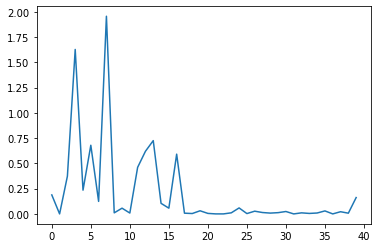

In [1164]:
train_model(train_dl, model)

In [1113]:
mse = evaluate_model(test_dl, model)

In [1114]:
print("MSE: %.3f, RMSE: %.3f" % (mse, sqrt(mse)))

MSE: 0.000, RMSE: 0.001


In [1134]:
test_var = np.array([150, 5]) #/ np.max(x)
test_var_norm = (test_var - np.mean(x)) / np.std(x)
y_hat = predict(test_var_norm, model) #* np.max(y)
y_act = (test_var[0] + test_var[1]) #* np.max(x)
y_hat_norm = np.std(y) * y_hat + np.mean(y) # de-normalise the output
print("predicted: %.3f" % y_hat_norm, y_act)

predicted: 154.386 155


In [ ]:
# todo:
# normalise the inputs using z norm
# https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
# https://stats.stackexchange.com/questions/66820/denormalize-value-after-prediction
# https://ai.stackexchange.com/questions/20001/do-i-need-to-denormalise-results-in-linear-regression
# try more hidden layers and reduce their size

# results:
# for numbers size 1-10, training works well with first hidden layer of 10 neurons with lr = 0.01
# for number of larger size (1-100) need to increase number of neurons to 100, reduce learning rate to 0.001
# for even larger numbers increased nn layer size to 1k and very long training gradually reducing lr to 0.00001 seemed to work. 
# but this problematic as nn might have memorised the outputs but not generaled sumation function

In [ ]:
# Notes, working version
# seems like normalising values with mean and std produces much less acurate results.
# however, if not normalised values then training is slow and does not always converge
# simple normalisation just x = x / max(x) works well
# bigger network produces much better results as well as compared just to 10 neuron layer in input stage